In [1]:
install.packages("ggplot2")
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
housing <- read.csv("Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


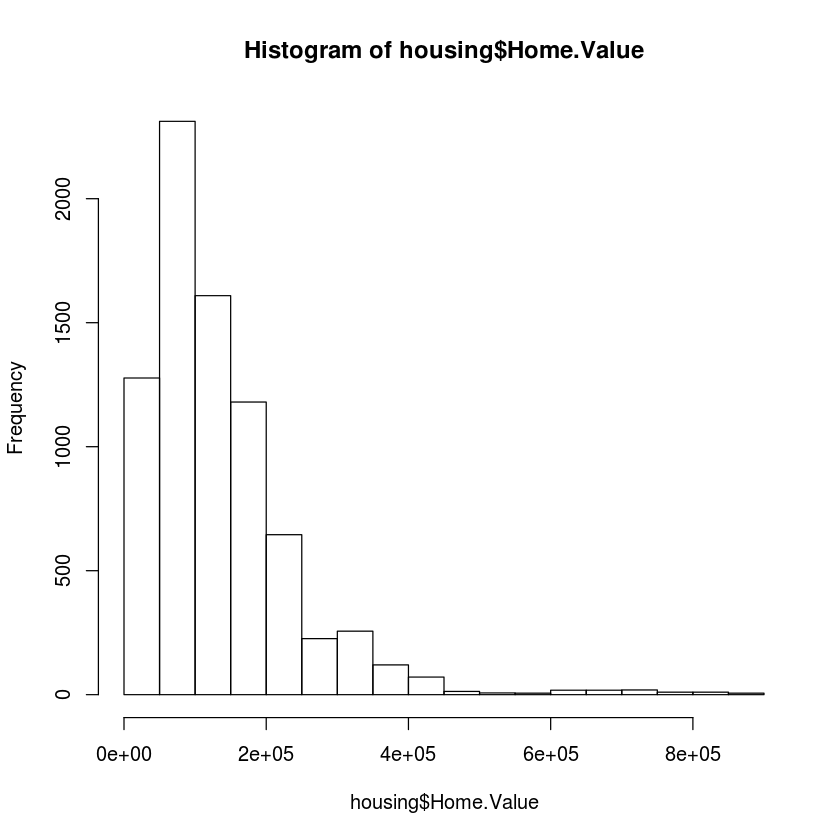

In [3]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


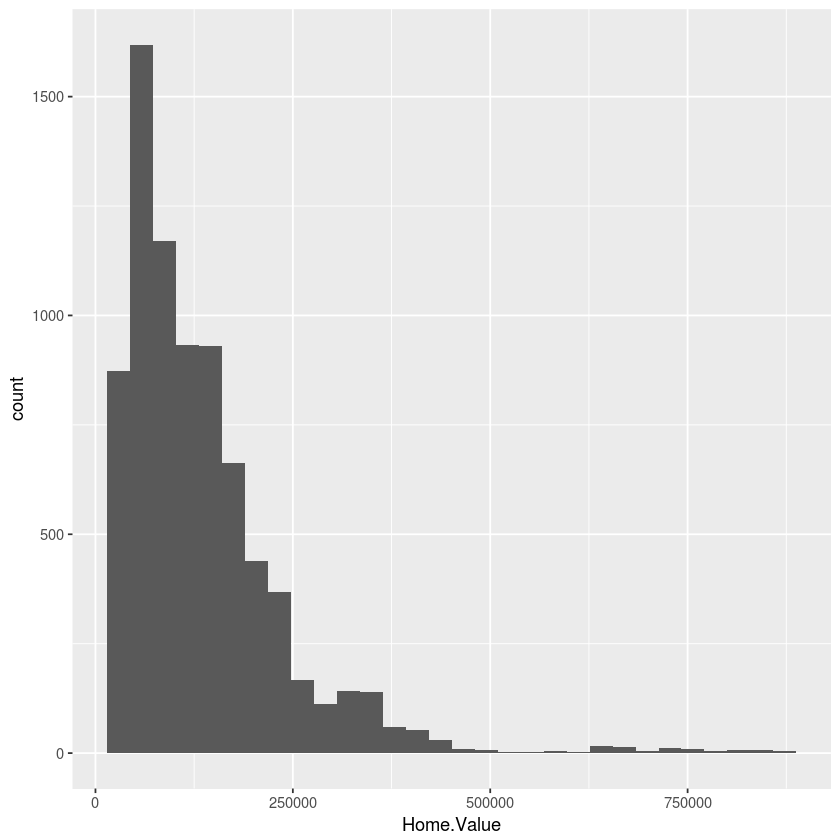

In [4]:
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

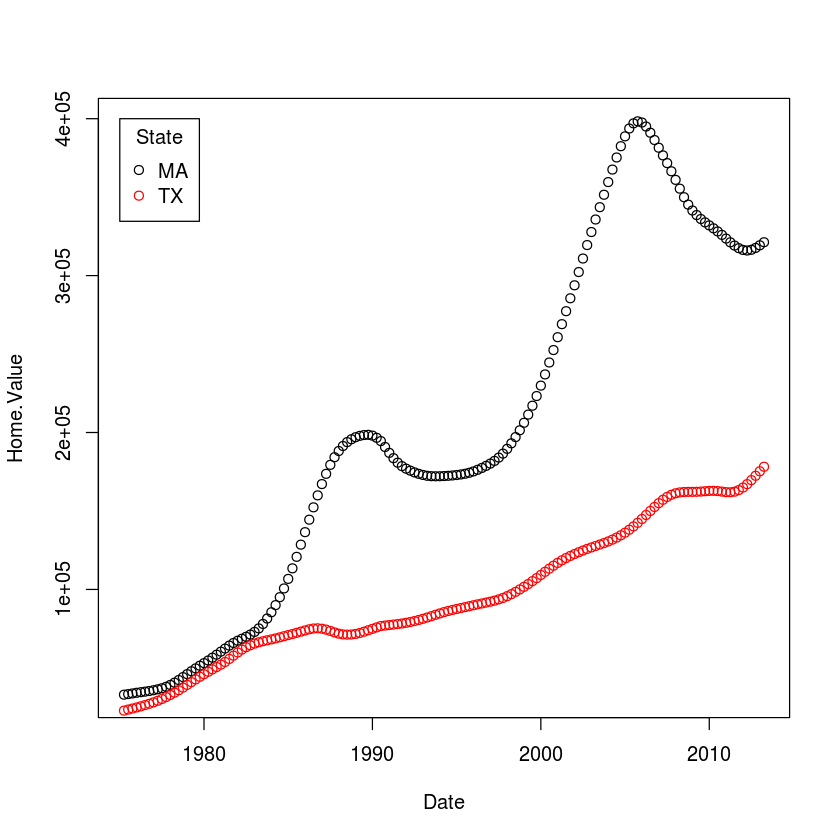

In [5]:
plot(Home.Value ~ Date, data = subset(housing, State=="MA"))
points(Home.Value ~ Date, col = "red", data = subset(housing, State=="TX"))
legend(1975, 400000, c("MA", "TX"), title = "State", col = c("black", "red"), pch = c(1,1))

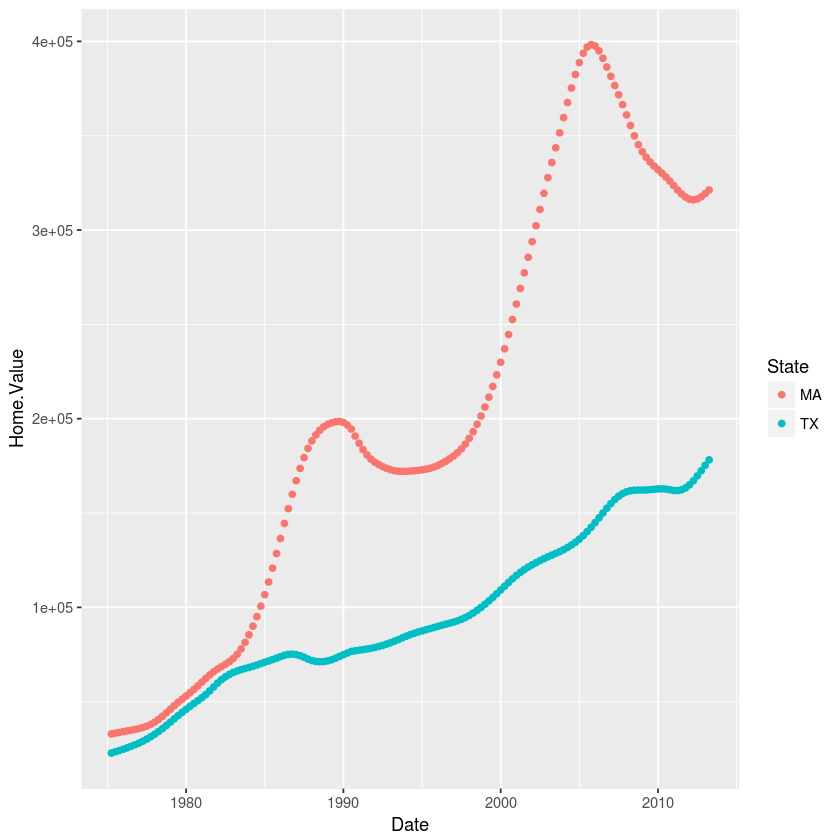

In [6]:
ggplot(subset(housing, State %in% c("MA", "TX")),   #aes mean aesthetic mapping (something you can see)
      aes(x = Date, y = Home.Value, color = State))+ geom_point()#each geom accepts certain aesthetics

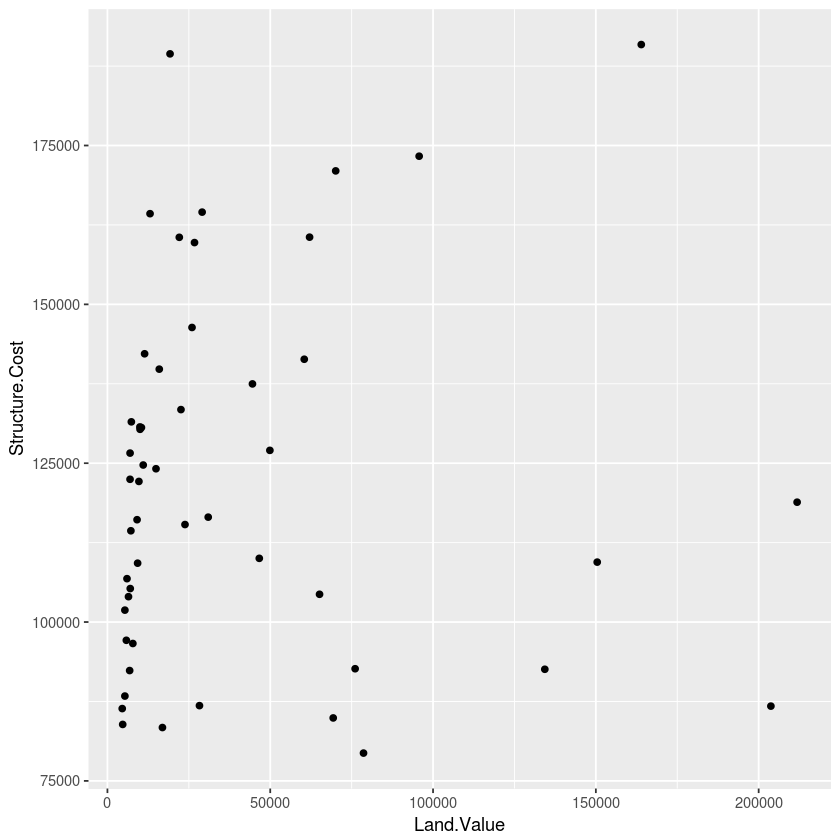

In [7]:
#geom_point requires mappings for x and y, all others are optional
hp2001Q1 <- subset(housing, Date==2001.25)
ggplot(hp2001Q1, aes(y = Structure.Cost, x = Land.Value)) + geom_point()

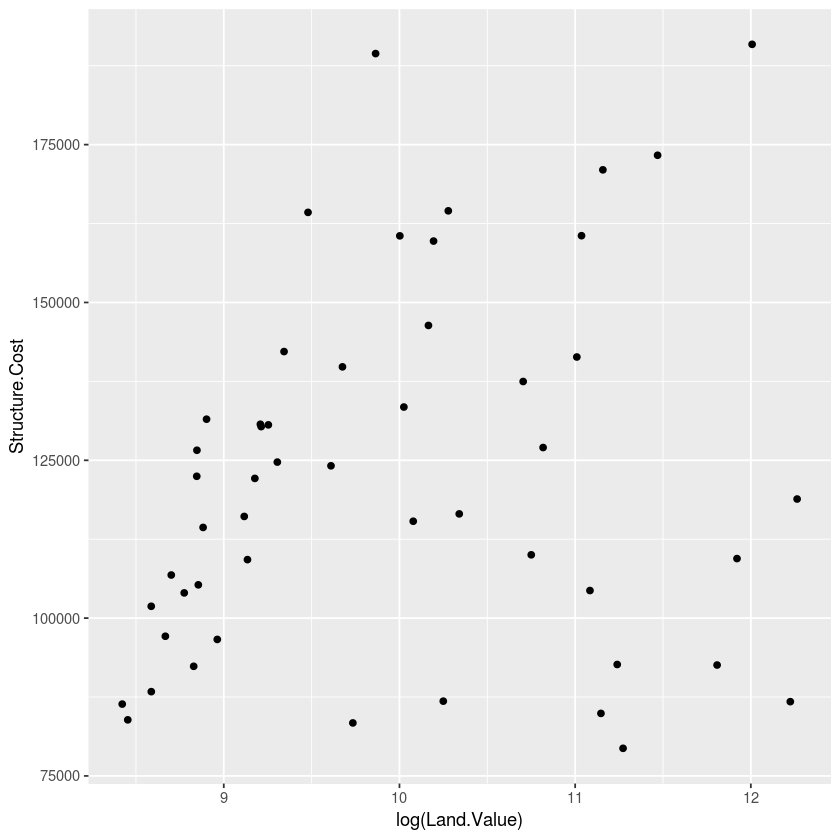

In [8]:
hp2001Q1 <- subset(housing, Date==2001.25)
ggplot(hp2001Q1, aes(y = Structure.Cost, x = log(Land.Value))) + geom_point()

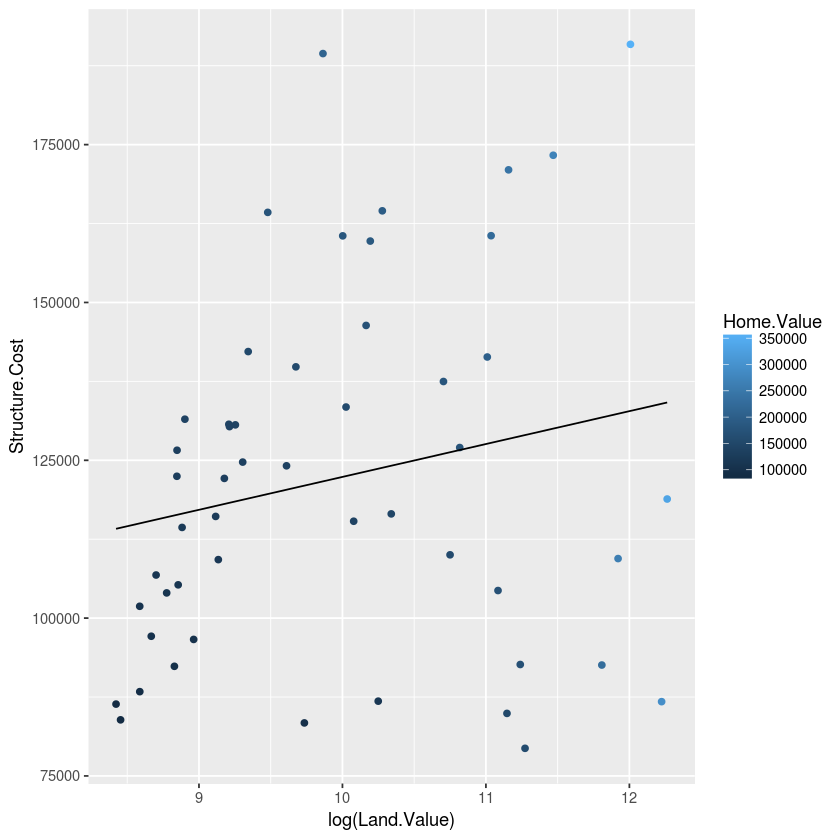

In [9]:
hp2001Q1$predLine <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))
p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))
p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = predLine))

`geom_smooth()` using method = 'loess'


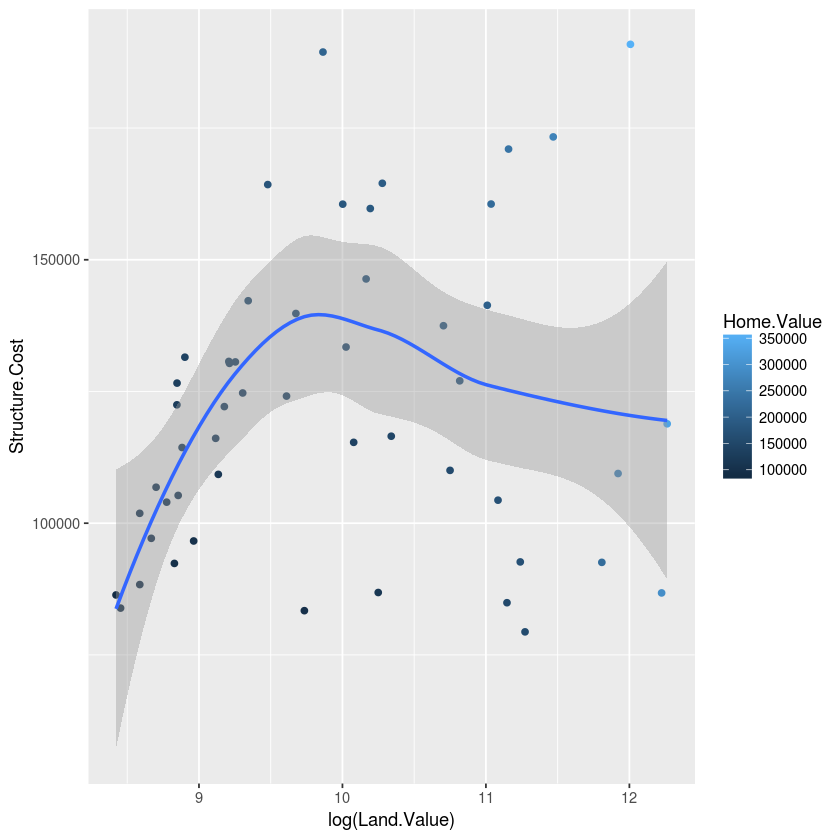

In [10]:
p1 + geom_point(aes(color = Home.Value)) + geom_smooth()

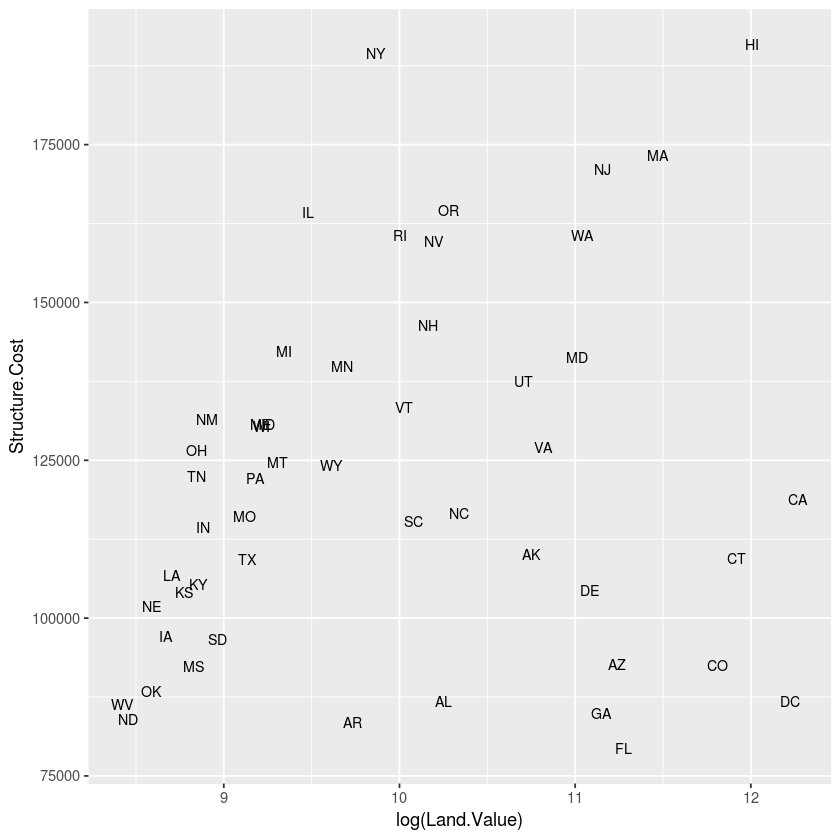

In [11]:
#Each geom accepts certain mappings (aes)
p1 + geom_text(aes(label = State), size = 3)

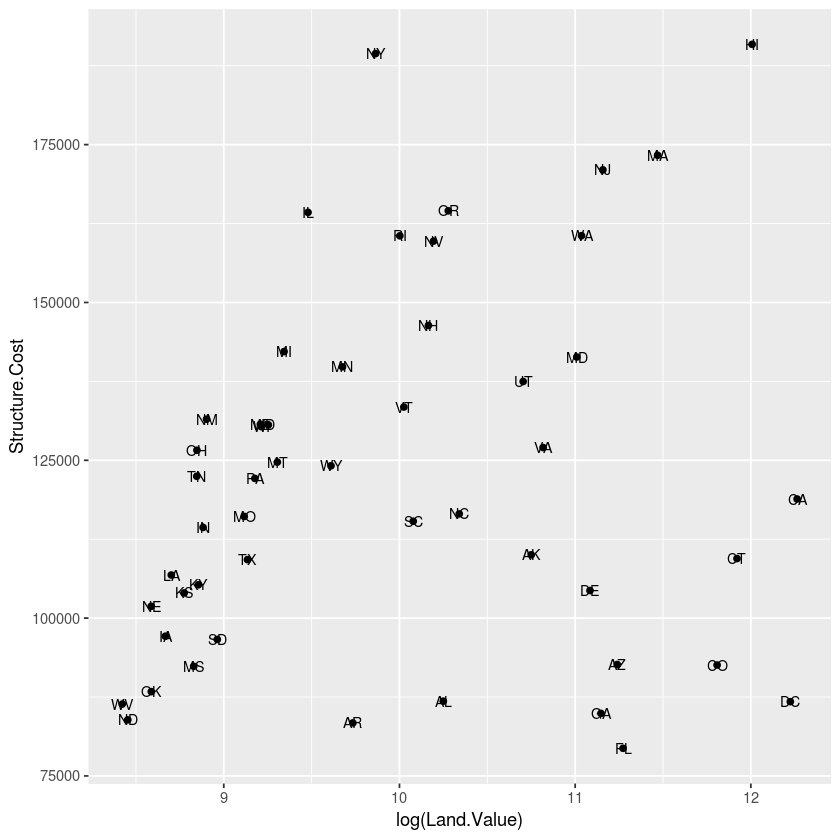

In [12]:
p1 + geom_point() + geom_text(aes(label = State), size = 3)

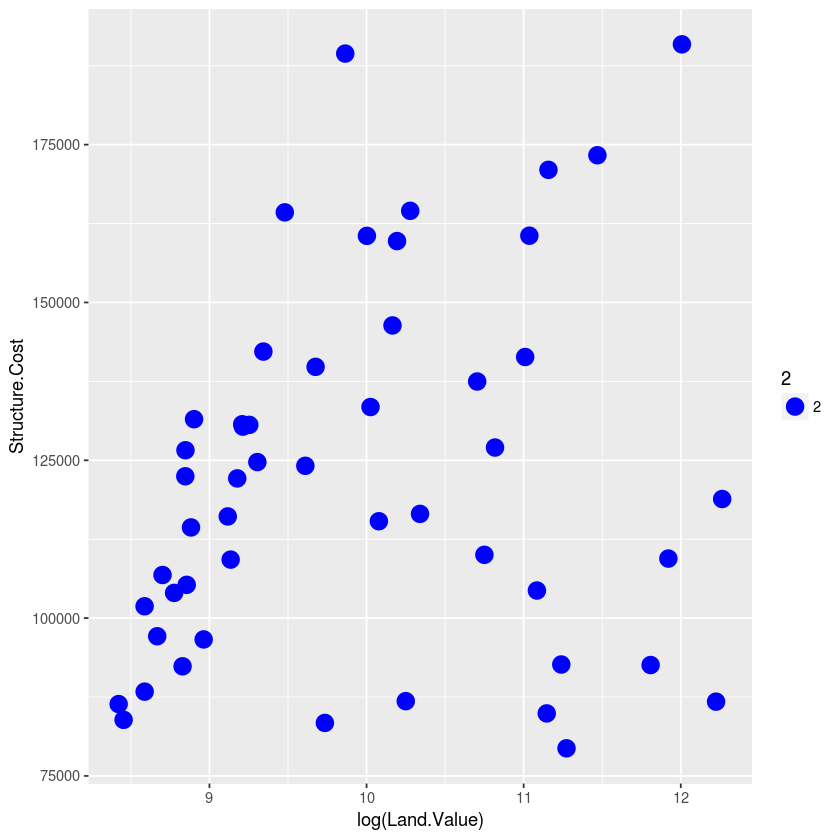

In [13]:
p1 + geom_point(aes(size =2), color = "blue")  #wrong as 2 isn't a variable

Warning message:
“Removed 1 rows containing missing values (geom_point).”

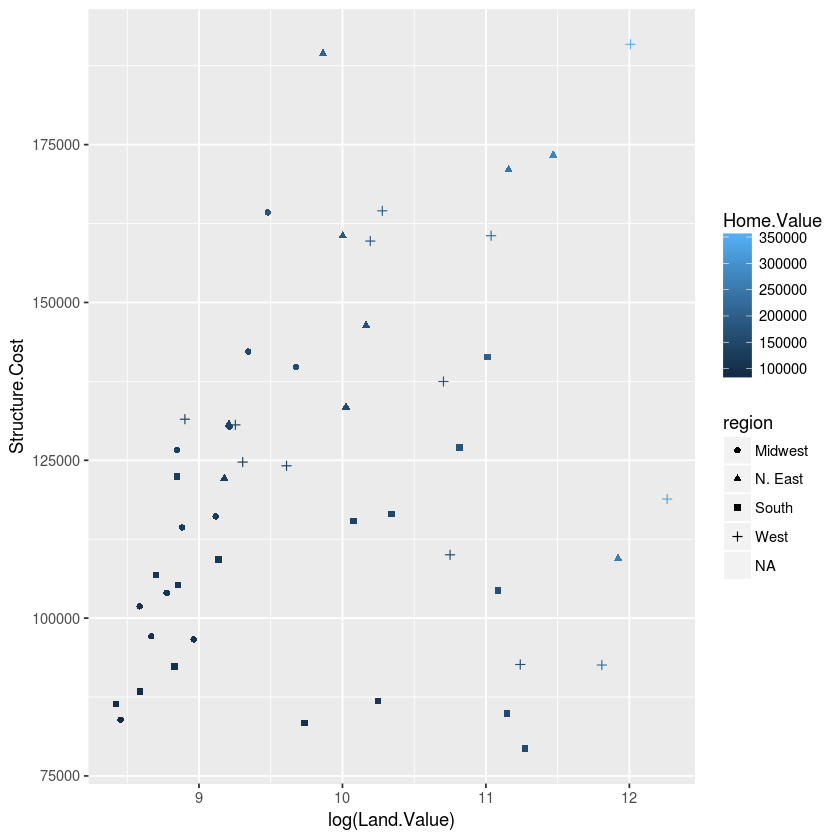

In [14]:
p1 + geom_point(aes(color = Home.Value, shape = region))

In [15]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


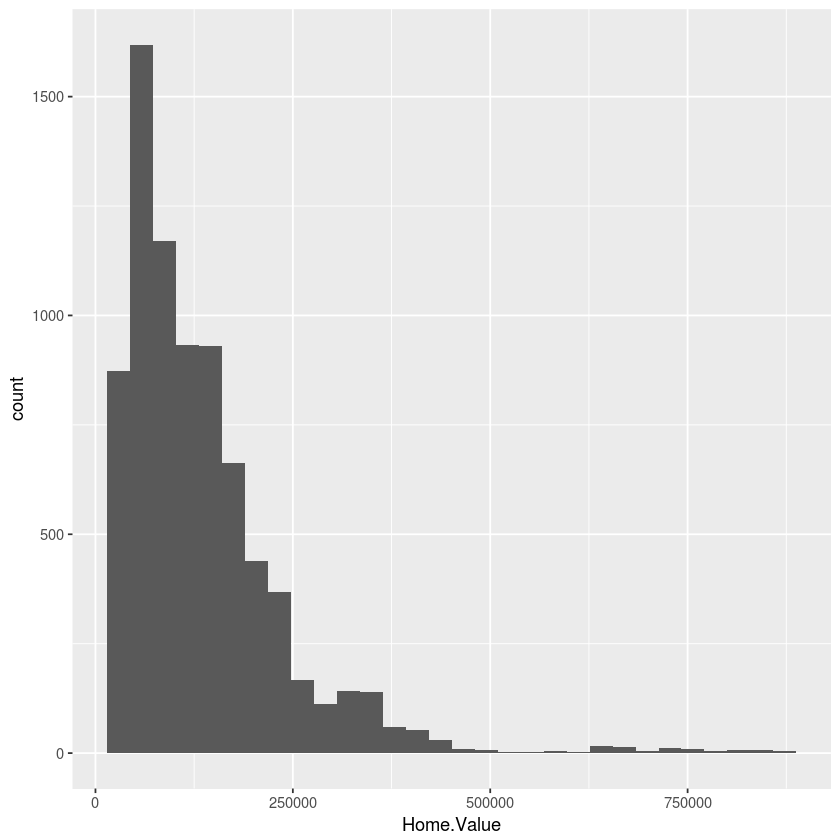

In [16]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

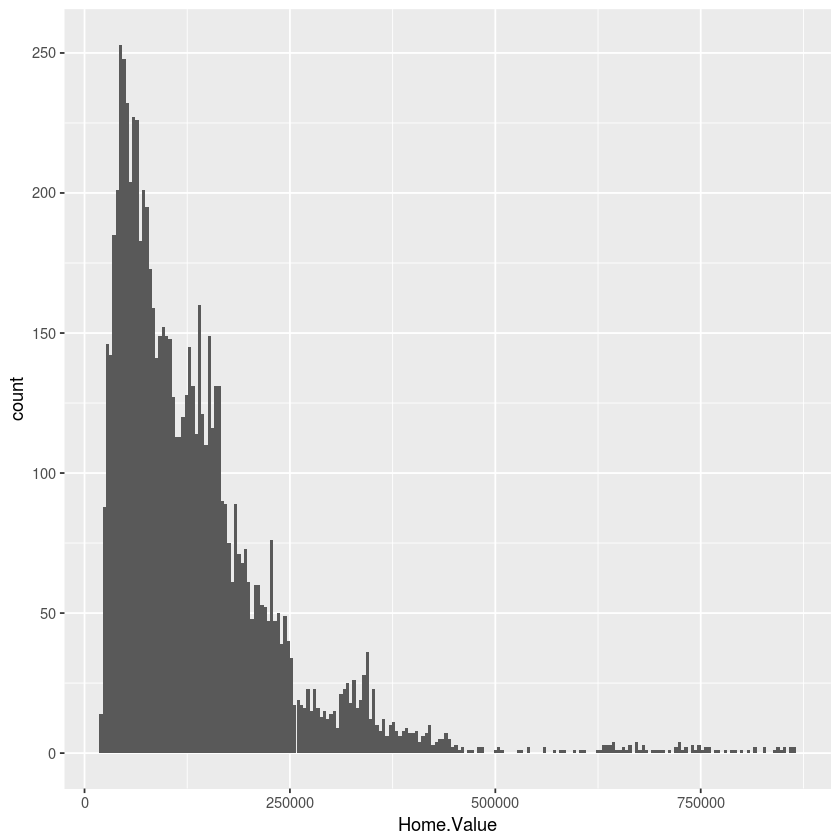

In [17]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [18]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


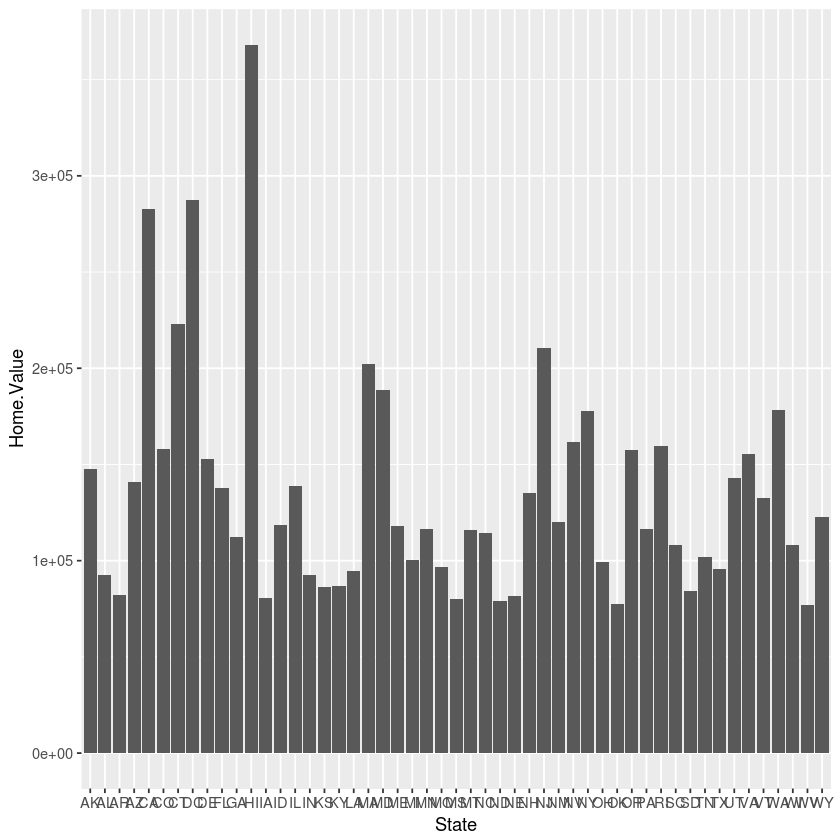

In [19]:
ggplot(housing.sum, aes(x = State, y = Home.Value)) + geom_bar(stat = "Identity")

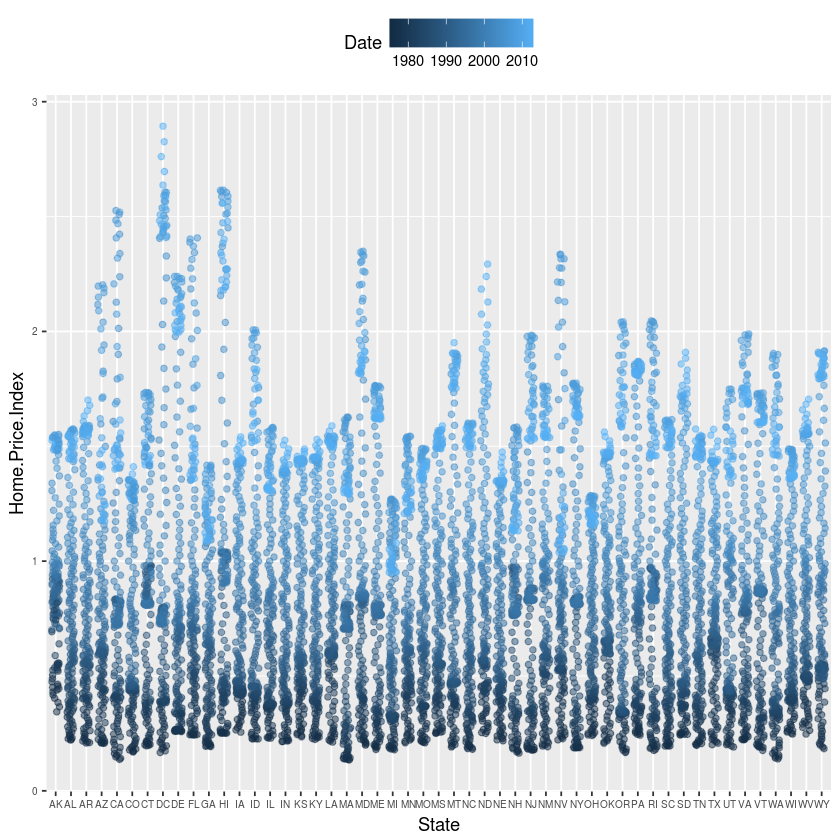

In [20]:
p3 <- ggplot(housing, aes(x = State, y = Home.Price.Index)) + 
        theme(legend.position="top", axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date), alpha = 0.5, size = 1.5,
    position = position_jitter(width = 0.25, height = 0)))

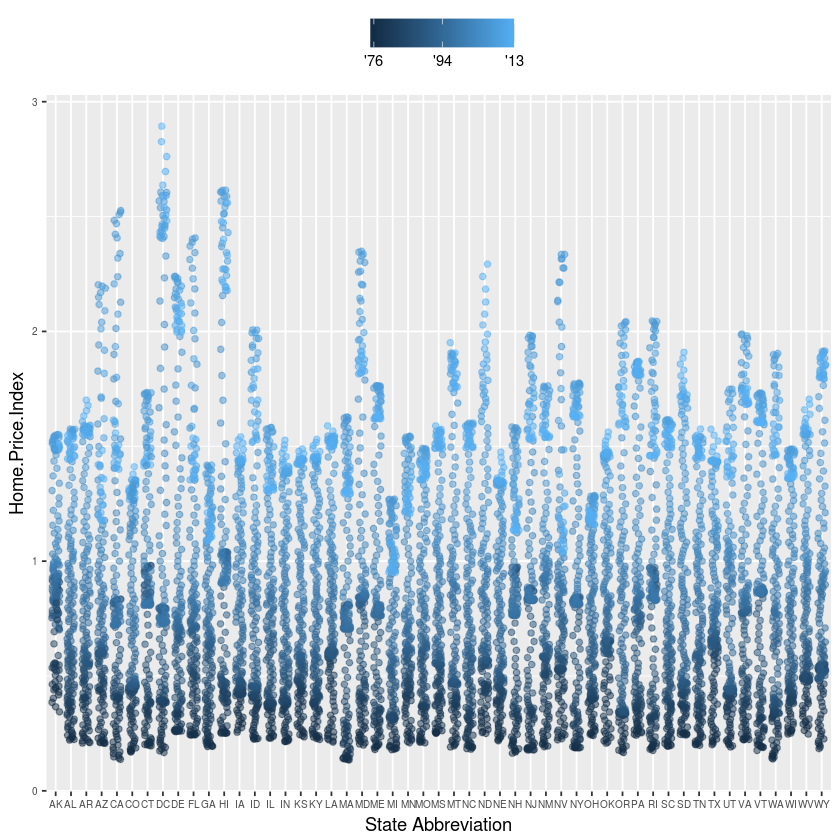

In [21]:
p4 + scale_x_discrete(name="State Abbreviation") +
scale_color_continuous(name="", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"))

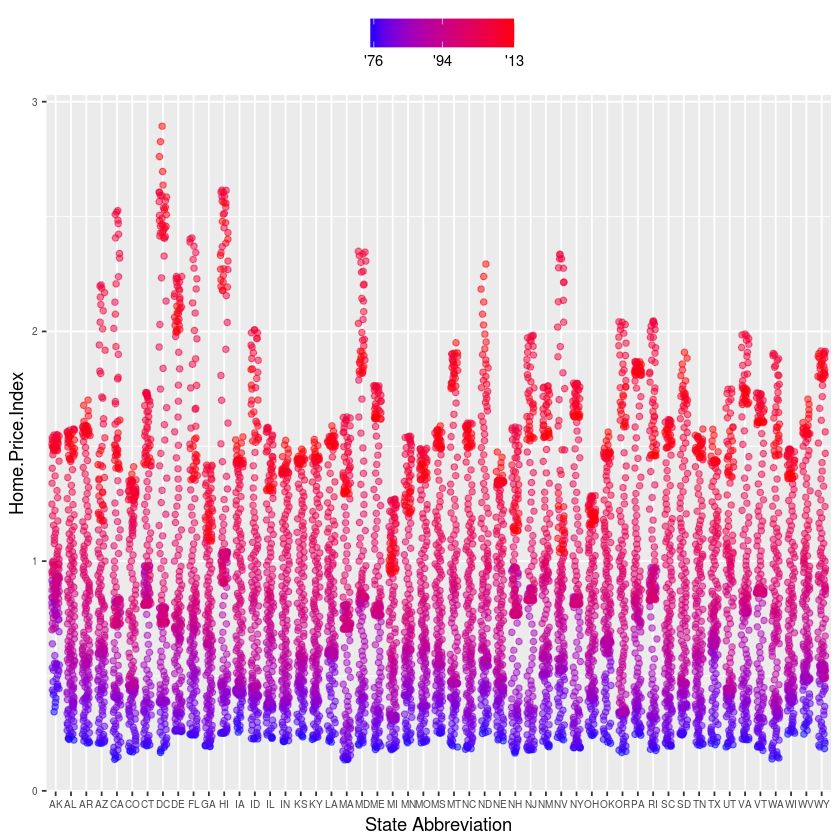

In [22]:
p4 + scale_x_discrete(name="State Abbreviation") + scale_color_continuous(name="",
breaks = c(1976, 1994, 2013),
labels = c("'76", "'94", "'13"),
low = "blue", high = "red")

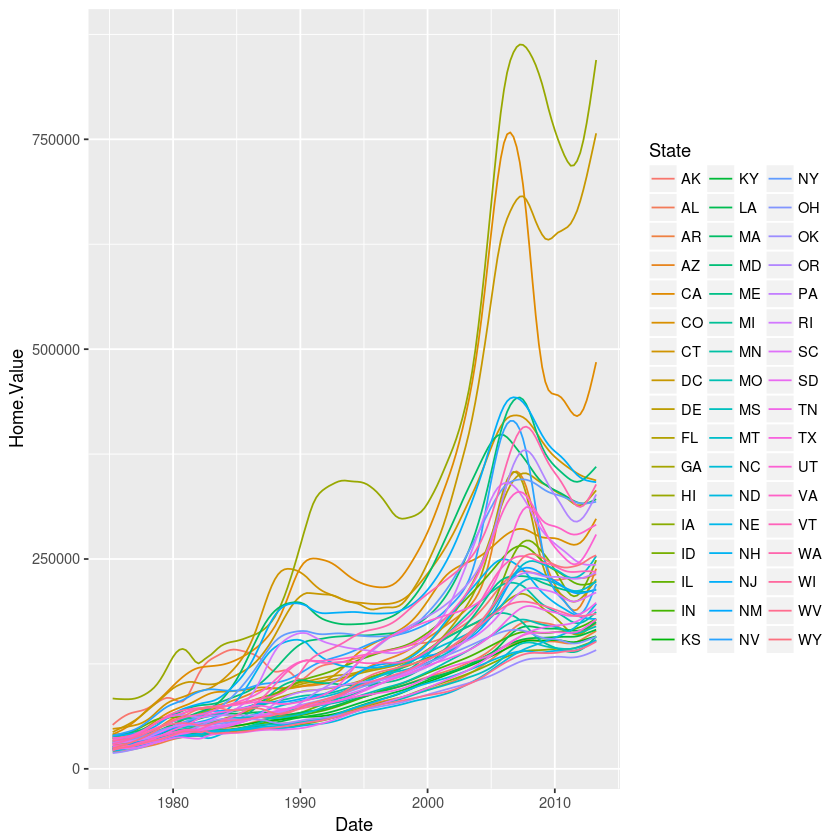

In [23]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

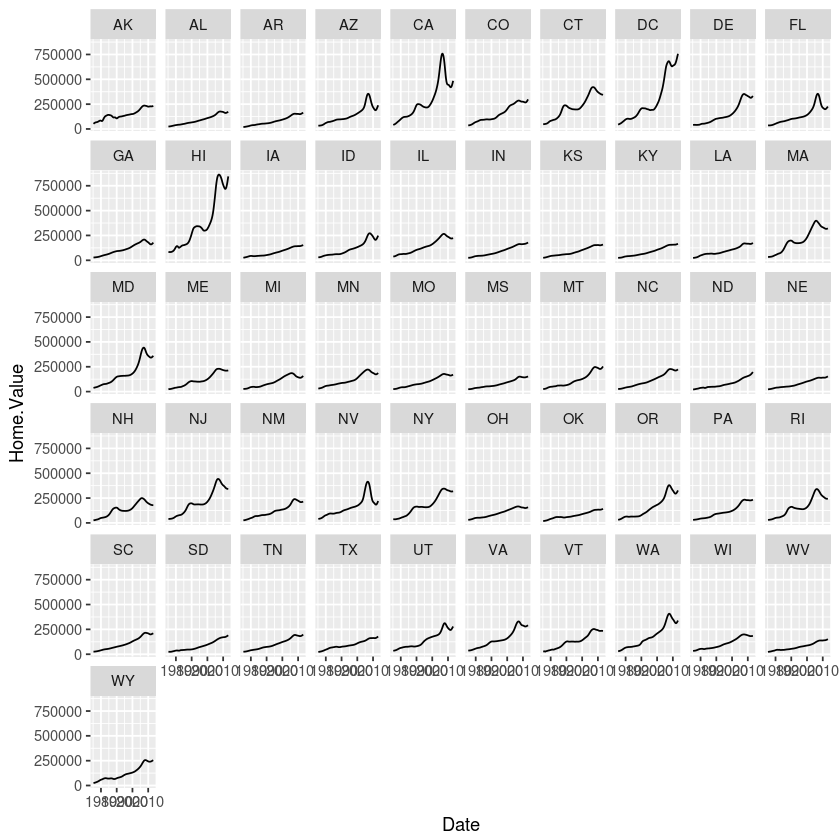

In [24]:
(p5 <- p5 + geom_line() + facet_wrap(~State, ncol = 10))

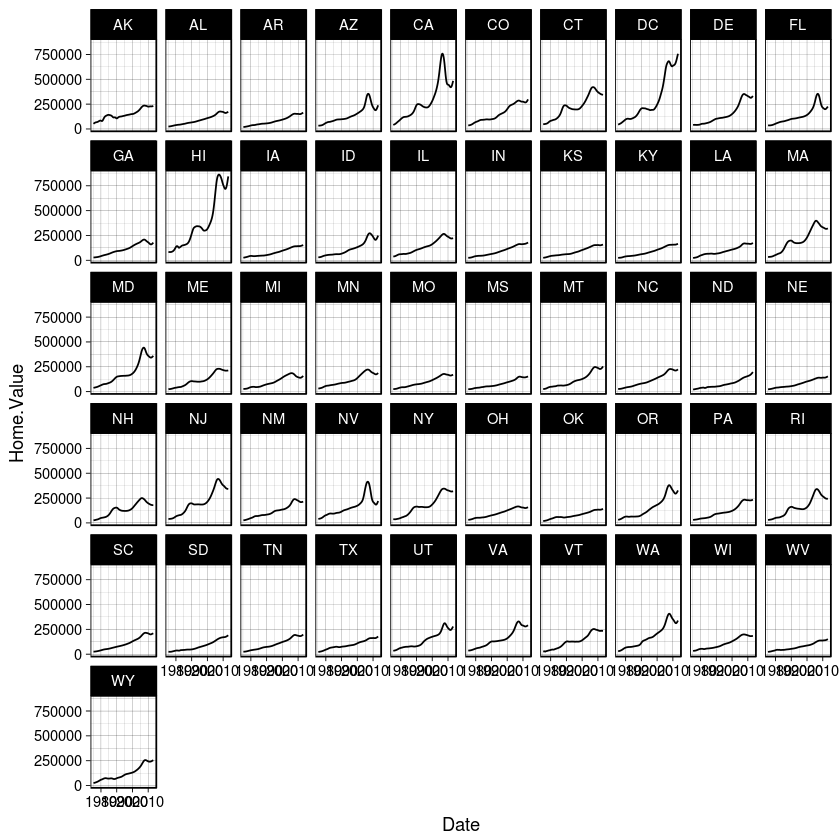

In [25]:
p5 + theme_linedraw()

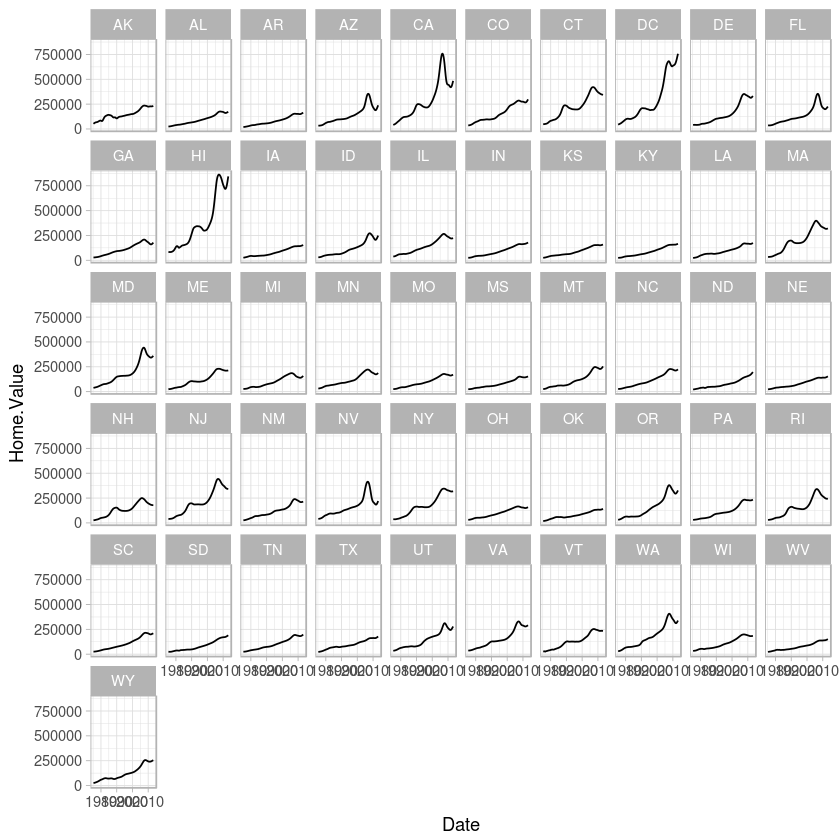

In [26]:
p5 + theme_light()

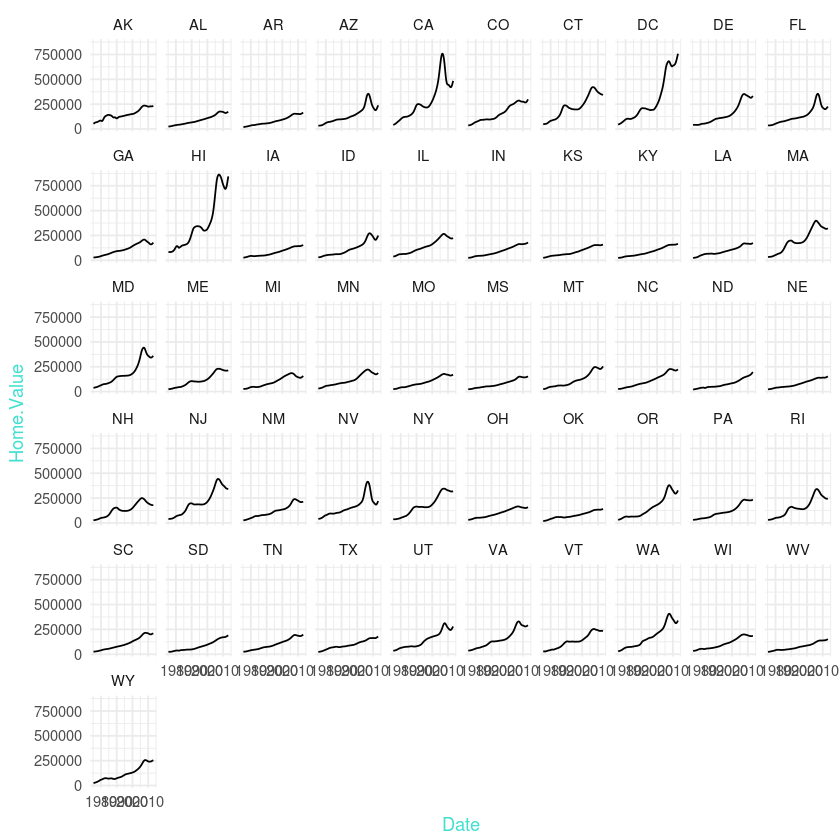

In [27]:
p5 + theme_minimal() + theme(text = element_text(color = "turquoise"))

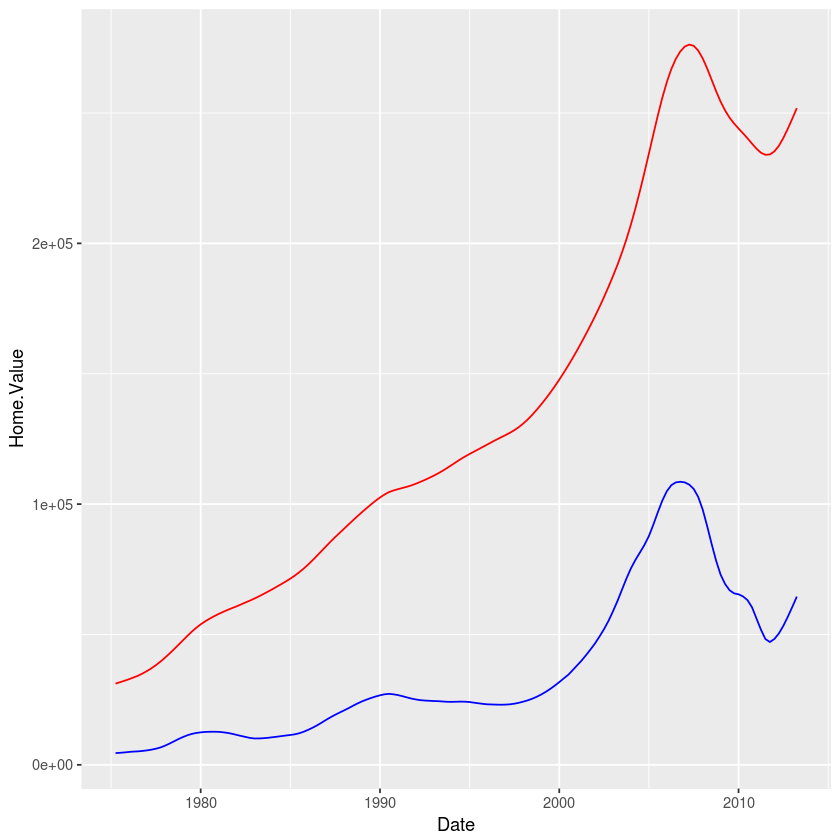

In [28]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")